# Df 0 1 1_ R O O T Data Source
This tutorial illustrates how use the RDataFrame in combination with a
RDataSource. In this case we use a TRootDS. This data source allows to read
a ROOT dataset from a RDataFrame in a different way, not based on the
regular RDataFrame code. This allows to perform all sorts of consistency
checks and illustrate the usage of the RDataSource in a didactic context.




**Author:** Danilo Piparo  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:03 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


A simple helper function to fill a test tree: this makes the example stand-alone.

In [2]:
def fill_tree(treeName, fileName):
    tdf = ROOT.ROOT.RDataFrame(10000)
    tdf.Define("b1", "(int) tdfentry_").Snapshot(treeName, fileName)

We prepare an input tree to run on

In [3]:
fileName = "df011_rootDataSource_py.root"
treeName = "myTree"
fill_tree(treeName, fileName)

Create the data frame

In [4]:
MakeRootDataFrame = ROOT.ROOT.RDF.MakeRootDataFrame

d = MakeRootDataFrame(treeName, fileName)

Now we have a regular RDataFrame: the ingestion of data is delegated to
the RDataSource. At this point everything works as before.

In [5]:
h = d.Define("x", "1./(b1 + 1.)").Histo1D(("h_s", "h_s", 128, 0, .6), "x")

Now we redo the same with a RDF and we draw the two histograms

In [6]:
c = ROOT.TCanvas()
c.SetLogy()
h.DrawClone()

<ROOT.TH1D object ("h_s") at 0x55ca9933d2d0>

Draw all canvases 

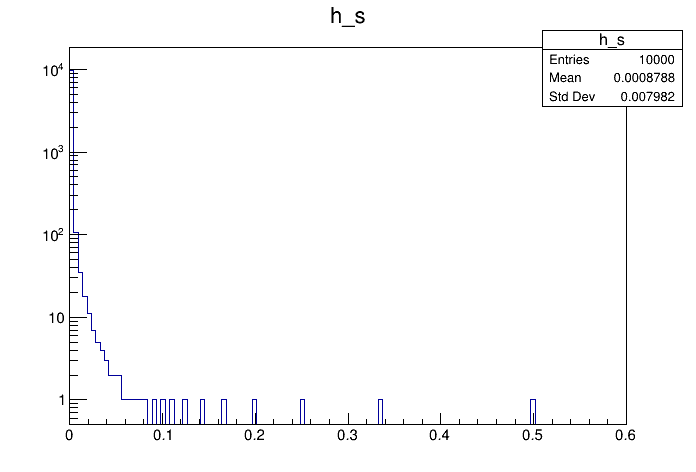

In [7]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()